# 爬取頭條新聞的標題及網址

In [1]:
import requests
from bs4 import BeautifulSoup

## 製作 Headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36'
}


url = 'https://fund.megabank.com.tw/ETFData/djjson/ETNEWSjson.djjson?a=1&P1=mega&P2=&P3=true&P4=false&P5=false'

res = requests.get(url, headers=headers)

In [2]:
res.text

'{ "ResultSet" : { "ExpireTime" : "2021/10/13 下午 09:36:54", "Result" : [ { "V1" : "2021/10/13", "V2" : "《陸股》人行降準在即？滬指收漲0.4%，創業板漲逾2%", "V3" : "F50E58F7-B4A3-4FCC-B46D-144FD4C3BD02" },{ "V1" : "2021/10/13", "V2" : "台股開高走低，量縮震盪收跌114點、失守16400點", "V3" : "C99F8893-0646-40C4-9511-57E04FFF7719" },{ "V1" : "2021/10/13", "V2" : "《日股》憂心經濟減速、日經指數續跌；蘋概股重摔", "V3" : "2EEE3DDE-E3C2-4638-9016-8FB3C18656D9" },{ "V1" : "2021/10/13", "V2" : "為抑制能源價格漲勢 美國或將要求OPEC提高產量", "V3" : "BCD31928-9152-49BE-9855-C470DC7D3996" },{ "V1" : "2021/10/13", "V2" : "鴻海入主俄州汽車廠 Fisker證實：在此打造PEAR電動車", "V3" : "68DAA39A-D0FB-40FE-8FFF-FF520B34733E" },{ "V1" : "2021/10/13", "V2" : "陸缺電發酵 習大力拚太陽能！發電成本後年打平燃煤", "V3" : "51F41F39-DAAB-4289-897E-D165A5DF65AB" },{ "V1" : "2021/10/13", "V2" : "韓媒：搶AP市佔！三星擴大使用自家處理器 拚出貨翻倍", "V3" : "36845C65-33FF-4C8C-898D-F47F194FE6C5" },{ "V1" : "2021/10/13", "V2" : "散裝船夯！日廠近半年造船訂單飆2倍、逼近去年全年", "V3" : "C4494AF2-8654-4027-9F4F-22CFF32A10EC" },{ "V1" : "2021/10/13", "V2" : "《DJ在線》太陽能再攻外銷 惟也憂國內市場門戶洞開", "V3" : "

In [3]:
for titleInfo in res.json()['ResultSet']['Result']:
    date = titleInfo['V1']
    title = titleInfo['V2']
    articleUrl = 'https://fund.megabank.com.tw/ETFData/djhtm/ETNEWSContentMega.djhtm?TYPE=1&DATE=&PAGE=1&A={}'.format(titleInfo['V3'])
    print(date)
    print(title)
    print(articleUrl)
    print('==========')

2021/10/13
《陸股》人行降準在即？滬指收漲0.4%，創業板漲逾2%
https://fund.megabank.com.tw/ETFData/djhtm/ETNEWSContentMega.djhtm?TYPE=1&DATE=&PAGE=1&A=F50E58F7-B4A3-4FCC-B46D-144FD4C3BD02
2021/10/13
台股開高走低，量縮震盪收跌114點、失守16400點
https://fund.megabank.com.tw/ETFData/djhtm/ETNEWSContentMega.djhtm?TYPE=1&DATE=&PAGE=1&A=C99F8893-0646-40C4-9511-57E04FFF7719
2021/10/13
《日股》憂心經濟減速、日經指數續跌；蘋概股重摔
https://fund.megabank.com.tw/ETFData/djhtm/ETNEWSContentMega.djhtm?TYPE=1&DATE=&PAGE=1&A=2EEE3DDE-E3C2-4638-9016-8FB3C18656D9
2021/10/13
為抑制能源價格漲勢 美國或將要求OPEC提高產量
https://fund.megabank.com.tw/ETFData/djhtm/ETNEWSContentMega.djhtm?TYPE=1&DATE=&PAGE=1&A=BCD31928-9152-49BE-9855-C470DC7D3996
2021/10/13
鴻海入主俄州汽車廠 Fisker證實：在此打造PEAR電動車
https://fund.megabank.com.tw/ETFData/djhtm/ETNEWSContentMega.djhtm?TYPE=1&DATE=&PAGE=1&A=68DAA39A-D0FB-40FE-8FFF-FF520B34733E
2021/10/13
陸缺電發酵 習大力拚太陽能！發電成本後年打平燃煤
https://fund.megabank.com.tw/ETFData/djhtm/ETNEWSContentMega.djhtm?TYPE=1&DATE=&PAGE=1&A=51F41F39-DAAB-4289-897E-D165A5DF65AB
2021/10/13
韓媒：搶AP市

# 整理標題及網址

In [4]:
import pandas as pd

data = list()
for titleInfo in res.json()['ResultSet']['Result']:
    date = titleInfo['V1']
    title = titleInfo['V2']
    articleUrl = 'https://fund.megabank.com.tw/ETFData/djhtm/ETNEWSContentMega.djhtm?TYPE=1&DATE=&PAGE=1&A={}'.format(titleInfo['V3'])
    tmpDataDict = {
        '日期': date,
        '標題': title,
        '網址': articleUrl
    }
    data.append(tmpDataDict)

df = pd.DataFrame(data=data)
df

,日期,標題,網址
0,2021/10/13,《陸股》人行降準在即？滬指收漲0.4%，創業板漲逾2%,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
1,2021/10/13,台股開高走低，量縮震盪收跌114點、失守16400點,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
2,2021/10/13,《日股》憂心經濟減速、日經指數續跌；蘋概股重摔,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
3,2021/10/13,為抑制能源價格漲勢 美國或將要求OPEC提高產量,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
4,2021/10/13,鴻海入主俄州汽車廠 Fisker證實：在此打造PEAR電動車,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
...,...,...,...
95,2021/10/08,純比特幣ETF近了？美SEC點頭核准比特幣概念ETF,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
96,2021/10/08,地震影響！瑞薩車用晶片工廠部分設備停工,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
97,2021/10/08,美釋戰備儲油、禁出口恐致災？高盛：天然氣漲更兇,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
98,2021/10/08,EUV光罩檢測設備商Lasertec：營收盈餘拚連續6年破表,https://fund.megabank.com.tw/ETFData/djhtm/ETN...


In [12]:
import time

df[df['日期'] == time.strftime("%Y/%m/%d", time.localtime())]

,日期,標題,網址
0,2021/10/13,《陸股》人行降準在即？滬指收漲0.4%，創業板漲逾2%,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
1,2021/10/13,台股開高走低，量縮震盪收跌114點、失守16400點,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
2,2021/10/13,《日股》憂心經濟減速、日經指數續跌；蘋概股重摔,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
3,2021/10/13,為抑制能源價格漲勢 美國或將要求OPEC提高產量,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
4,2021/10/13,鴻海入主俄州汽車廠 Fisker證實：在此打造PEAR電動車,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
5,2021/10/13,陸缺電發酵 習大力拚太陽能！發電成本後年打平燃煤,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
6,2021/10/13,韓媒：搶AP市佔！三星擴大使用自家處理器 拚出貨翻倍,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
7,2021/10/13,散裝船夯！日廠近半年造船訂單飆2倍、逼近去年全年,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
8,2021/10/13,《DJ在線》太陽能再攻外銷 惟也憂國內市場門戶洞開,https://fund.megabank.com.tw/ETFData/djhtm/ETN...
9,2021/10/13,要電靠自己！柴油發電機成陸廠搶手貨 月租費翻三倍,https://fund.megabank.com.tw/ETFData/djhtm/ETN...


# 儲存文章

In [5]:
# 測試

resArticle = requests.get('https://fund.megabank.com.tw/ETFData/djhtm/ETNEWSContentMega.djhtm?TYPE=1&DATE=&PAGE=1&A=C51241AA-8AE4-4677-A242-B8E2ADD0E1E8', headers=headers)

resArticle.text

'<html>\r\r<head>\r\r<script type="text/javascript" src="/ETFData/JQuery/jquery.djjs"></script>\r\n<script type="text/javascript" src="/ETFData/JQuery/jquery.tablesorter.djjs"></script>\r\n<script type="text/javascript" src="/ETFWeb/djjs/globalJSVar.djjs"></script>\r\n<script type="text/javascript" src="/ETFData/js/JsonData.djjs"></script>\r\n<script type="text/javascript" src="/ETFData/js/JsonCombox.djjs"></script>\r\n<script type="text/javascript" src="/ETFData/js/DJFunction.djjs"></script>\r\n<script type="text/javascript" src="/ETFWeb/djjs/globalJSFun.djjs"></script>\r\n<link rel=stylesheet href="/ETFWeb/js/etfstyle.css" type="text/css">\r\n<meta HTTP-EQUIV="Content-Type" CONTENT="text/html; charset=big5">\r\n<meta HTTP-EQUIV="PRAGMA" CONTENT="NO-CACHE">\r\n<title>新聞內文</title>\r\n</head>\r\n<body>\r\n<div align=center id="SysJustIFRAMEDIV">\r\n<script language="javascript" src="/etfweb/js/SU.js"></script>\r\n<script type="text/javascript">\r\nif (typeof (JSON) == \'undefined\') { \

In [6]:
soupArticle = BeautifulSoup(resArticle.text, 'html.parser')
soupArticle.select('td[class="NewsContent-Down"]')[0].select('span[style="TEXT-ALIGN: left"]')[0].text

'最近大盤震盪大，一部分原因與中國一連串重拳整頓政策有關，大家一定不斷聽到恆大事件、能耗雙控，這些事件背後是否有一貫中國治理邏輯？本集請到長期深入追蹤中國經濟的分析師，幫大家釐清一連串事件原因，以及中國經濟措施後續可能的走向。 \r\n\n\n---------------'

In [7]:
import os

# 創建資料夾用來存放文章
if not os.path.exists('./articleFolder'):
    os.mkdir('./articleFolder')

for titleInfo in res.json()['ResultSet']['Result']:
    title = titleInfo['V2']
    articleUrl = 'https://fund.megabank.com.tw/ETFData/djhtm/ETNEWSContentMega.djhtm?TYPE=1&DATE=&PAGE=1&A={}'.format(titleInfo['V3'])
    resArticle = requests.get(articleUrl, headers=headers)
    soupArticle = BeautifulSoup(resArticle.text, 'html.parser')
    articleContent = soupArticle.select('td[class="NewsContent-Down"]')[0].text
#     print(articleContent)
    try:
        with open('./articleFolder/{}.txt'.format(title), 'w', encoding='utf-8') as f:
            f.write(articleContent)
    except FileNotFoundError:
        with open('./articleFolder/{}.txt'.format(title.replace('/', '')), 'w', encoding='utf-8') as f:
            f.write(articleContent)
    except OSError:
        pass
#     print('==========') 

# 統計熱門關鍵字

In [8]:
import jieba
import glob

def isContained(orgStr, subStrList):
    for subStr in subStrList:
        if subStr in orgStr:
            return True
    return False

sb = ''
for articleFilePath in glob.glob('./articleFolder/*.txt'):
    with open(articleFilePath, 'r', encoding='utf-8') as f:
        sb += f.read()

jieba.load_userdict('./mydict.txt')
stopWords = [' ', '，', '（', '）', '...', '。', '「', '」', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
wordCutList = [w for w in jieba.cut(sb)]

wordCountDict = dict()
for w in wordCutList:
    if w.__len__() > 1 and not isContained(w, stopWords):
        if w in wordCountDict:
            wordCountDict[w] += 1
        else:
            wordCountDict[w] = 1

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/bv/8bbkzq895db366kq27vw262r0000gn/T/jieba.cache
Loading model cost 0.949 seconds.
Prefix dict has been built successfully.


In [9]:
wordCountDict

{'新台幣': 14,
 '美元': 491,
 '匯價': 5,
 '中午': 5,
 '暫收': 4,
 '貶值': 10,
 '成交': 23,
 '金額': 17,
 'MoneyDJ': 195,
 '新聞': 207,
 '記者': 180,
 '文章': 17,
 '報導': 388,
 '普氏': 6,
 '能源': 100,
 '資訊': 13,
 '本週': 17,
 '舉行': 11,
 '倫敦': 13,
 '金屬': 28,
 '交易所': 54,
 '年會': 4,
 'LME': 8,
 'Week': 4,
 '專家': 13,
 '表示': 241,
 '全球': 205,
 '綠色': 3,
 '過渡': 6,
 '將會': 23,
 '有利於': 3,
 '銅與': 2,
 '需求': 158,
 '前景': 10,
 '特別': 16,
 '電動車': 39,
 '銷售': 44,
 '以及': 107,
 '相關': 188,
 '電池': 59,
 '專注': 4,
 '礦業': 22,
 '部門': 5,
 '瑞士': 6,
 '投資': 202,
 '公司': 162,
 'Pala': 1,
 'Investments': 2,
 'Limited': 3,
 '首席': 15,
 '策略': 29,
 'Jessica': 1,
 'Fung': 1,
 '疫情': 130,
 '方面': 44,
 '成為': 63,
 '經濟': 160,
 '催化': 5,
 '市場': 244,
 '看來': 4,
 '更加': 10,
 '光明': 1,
 '預估': 136,
 '部門將': 1,
 '鎳市': 2,
 '比重': 37,
 '更將': 1,
 '提高': 51,
 '相比': 19,
 '僅為': 1,
 '規模': 26,
 '增長': 47,
 '足以': 2,
 '滿足': 11,
 '英國': 36,
 '商品': 38,
 '研究所': 4,
 'CRU': 2,
 '基本': 21,
 '研究': 45,
 '主管': 18,
 'Vanessa': 1,
 'Davidson': 1,
 '今明': 2,
 '兩年': 6,
 '銅消費': 1,
 '將分別': 3,
 '銅市': 7,


# 製作文字雲

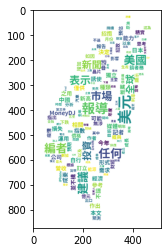

In [10]:
import matplotlib.pyplot as plt
import wordcloud
import numpy
from PIL import Image

# 字體設定
font_path = 'TaipeiSansTCBeta-Bold.ttf'
# 圖片轉陣列
mask = numpy.array(Image.open('taiwan.png'))

wc = wordcloud.WordCloud(background_color='white',
                         margin=2, # 文字間距
                         mask=mask, # 遮罩
                         font_path=font_path,
                         max_words=150, # 取多少文字在裡面
                         width=874, height=516, # 長寬解析度
                         )
# 生成文字雲
wc.generate_from_frequencies(wordCountDict)

wc.to_file('myWordCloud.png')

plt.imshow(wc)

In [ ]:
wordCountDict